In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('bank-full.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [44]:
df.columns 

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [45]:
df['job'] = df['job'].astype('category')
df['job'] = df['job'].cat.codes
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,9,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,1,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,11,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,5,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,5,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,1,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['y'] = le.fit_transform(df['y'])

In [47]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,may,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,may,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,may,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,may,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,may,198,1,-1,0,3,0


In [48]:
bnk=df.iloc[:,[0,1,2,3,4,5,6,7,8,11,12,14,15,16]]
bnk

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,261,1,0,3,0
1,44,9,2,1,0,29,1,0,2,151,1,0,3,0
2,33,2,1,1,0,2,1,1,2,76,1,0,3,0
3,47,1,1,3,0,1506,1,0,2,92,1,0,3,0
4,33,11,2,3,0,1,0,0,2,198,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,977,3,0,3,1
45207,71,5,0,0,0,1729,0,0,0,456,2,0,3,1
45208,72,5,1,1,0,5715,0,0,0,1127,5,3,2,1
45209,57,1,1,1,0,668,0,0,1,508,4,0,3,0


In [49]:
bnk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int8 
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   duration   45211 non-null  int64
 10  campaign   45211 non-null  int64
 11  previous   45211 non-null  int64
 12  poutcome   45211 non-null  int32
 13  y          45211 non-null  int32
dtypes: int32(8), int64(5), int8(1)
memory usage: 3.1 MB


In [50]:
bnk.corr()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.004648,0.004760,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.004744,0.006839,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,0.011852,-0.008994,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.001935,0.006255,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,-0.010021,0.016822,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.021560,-0.014578,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,0.005075,-0.023599,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,-0.012412,0.009980,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.020839,0.019614,-0.147811,0.272214,-0.148395
duration,-0.004648,0.004744,0.011852,0.001935,-0.010021,0.021560,0.005075,-0.012412,-0.020839,1.000000,-0.084570,0.001203,0.010925,0.394521


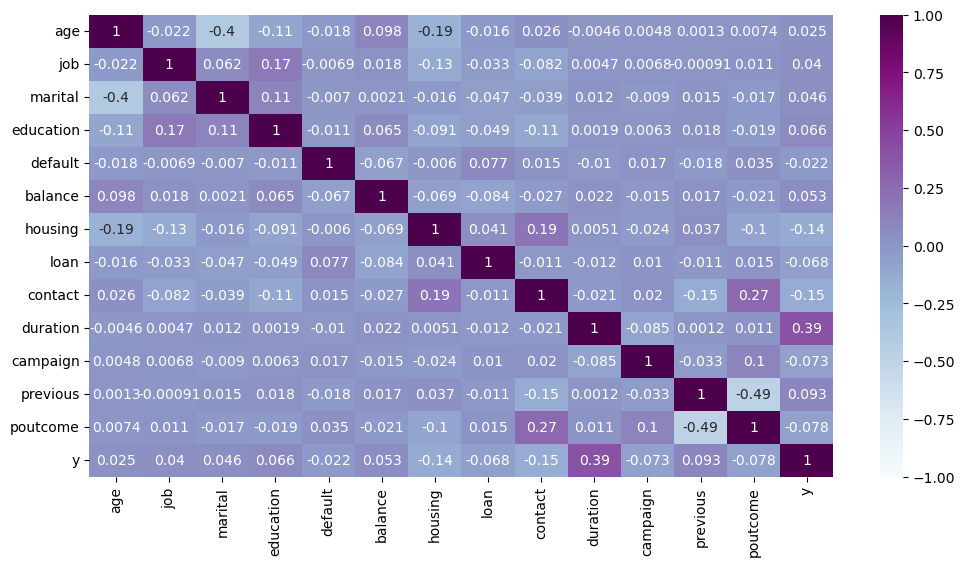

In [51]:
plt.figure(figsize=(12,6))
sns.heatmap(bnk.corr(),vmin = -1,vmax = 1 ,annot = True ,cmap = 'BuPu')
plt.show()

In [52]:
X = bnk.drop(['y'],axis = 1)
X
y = bnk['y']
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [55]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\ygred\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
y_pred_test = model.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
y_pred_test_prob = model.predict_proba(X_test)
print(y_pred_test_prob)

[[0.95581173 0.04418827]
 [0.97336534 0.02663466]
 [0.8872272  0.1127728 ]
 ...
 [0.95432258 0.04567742]
 [0.9670467  0.0329533 ]
 [0.94855727 0.05144273]]


In [59]:
from sklearn import metrics
metrics.accuracy_score(y_train, y_pred_train)

0.8885478876354789

In [60]:
metrics.accuracy_score(y_test, y_pred_test)

0.8863209112020347

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

In [62]:
confusion_matrix(y_test, y_pred_test)

array([[7814,  138],
       [ 890,  201]], dtype=int64)

In [63]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.59      0.18      0.28      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043



In [64]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31970
           1       0.57      0.17      0.26      4198

    accuracy                           0.89     36168
   macro avg       0.73      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168



In [65]:
print(y_test,y_pred_test)

3776     0
9928     0
33409    0
31885    0
15738    0
        ..
13353    0
38732    1
5654     0
3779     0
11677    0
Name: y, Length: 9043, dtype: int32 [0 0 0 ... 0 0 0]


In [66]:
pd.DataFrame({'Actual':y_test,'Predict':y_pred_test})

,Actual,Predict
3776,0,0
9928,0,0
33409,0,0
31885,0,0
15738,0,0
...,...,...
13353,0,0
38732,1,0
5654,0,0
3779,0,0


In [67]:
pd.DataFrame({'Actual':y_train,'Predict':y_pred_train})

,Actual,Predict
3344,0,0
17965,0,0
18299,0,0
10221,0,0
32192,1,0
...,...,...
11284,1,1
44732,0,0
38158,0,0
860,0,0


In [68]:
#AUC Value
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_pred_test)
logit_roc_auc

0.5834402611821248

(0.0, 1.05)

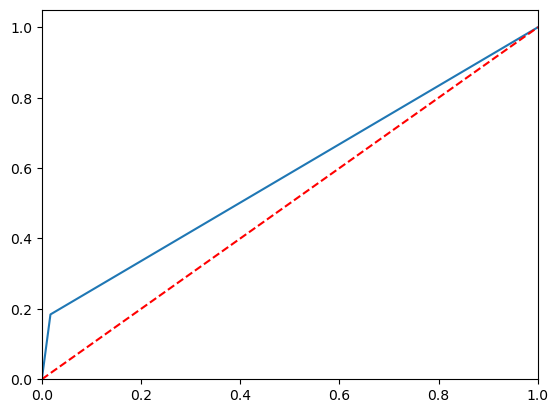

In [69]:
#Plotting the ROC Curve
fpr, tpr, threshold = roc_curve(y_test, y_pred_test)
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

Hyper parameter Tuning

In [80]:
model = LogisticRegression(penalty='l2',
    dual=False,
    tol=0.0001,
    C=2.0,
    intercept_scaling=3,
    class_weight=None,
    random_state=42,
    max_iter=100)
model.fit(X_train,y_train)

C:\Users\ygred\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=2.0, intercept_scaling=3, random_state=42)

In [81]:
y_pred_test = model.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [82]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
print(metrics.accuracy_score(y_train, y_pred_train))
print(metrics.accuracy_score(y_test, y_pred_test))


0.8886861313868614
0.8860997456596262


In [84]:
confusion_matrix(y_test, y_pred_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.59      0.18      0.28      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043



In [85]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31970
           1       0.57      0.17      0.27      4198

    accuracy                           0.89     36168
   macro avg       0.73      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168



In [86]:
#AUC Value
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_pred_test)
logit_roc_auc

0.5833145066549619

(0.0, 1.05)

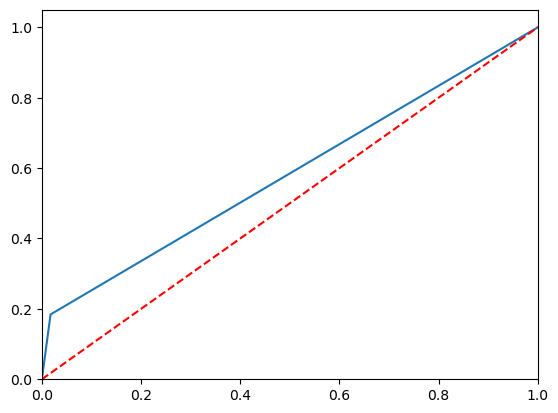

In [87]:
#Plotting the ROC Curve
fpr, tpr, threshold = roc_curve(y_test, y_pred_test)
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])